# Coffee from major markets provide more marketing, sales, and profits

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#load data from https://data.world/santhosh586/gfdgdg
url = 'https://query.data.world/s/nfygopbhprl2ar5ney4g2ja54jdc2t'
COFFEE = pd.read_excel(url)
print(COFFEE)
print(COFFEE.shape) #dimensions of dataframe
col_names = ['Row_ID', 'Area_Code', 'Date', 'Market', 'Market_Size', 'Product', 'Product_Line', 'Product_Type', 'State',
             'Type', 'Budget_COGS', 'Budget_Margin', 'Budget_Profit', 'Budget_Sales', 'COGS', 'Inventory', 'Margin',
             'Marketing', 'Profit', 'Sales', 'Total_Expenses']
dframe = pd.read_excel(url, names = col_names) #replace spaces with _ in the columns

      Row ID  Area Code   Date   Market   Market Size            Product  \
0          1        719  40909  Central  Major Market           Amaretto   
1          2        970  40909  Central  Major Market          Colombian   
2          3        970  40909  Central  Major Market  Decaf Irish Cream   
3          4        303  40909  Central  Major Market          Green Tea   
4          5        303  40909  Central  Major Market        Caffe Mocha   
...      ...        ...    ...      ...           ...                ...   
8491    8492        318  41609    South  Small Market              Lemon   
8492    8493        985  41609    South  Small Market          Colombian   
8493    8494        337  41609    South  Small Market  Decaf Irish Cream   
8494    8495        225  41609    South  Small Market        Caffe Latte   
8495    8496        225  41609    South  Small Market        Caffe Mocha   

     Product Line Product Type      State     Type  ...  Budget Margin  \
0           B

# Market Sizes

In [3]:
market_sizes = dframe.Market_Size.unique()
print(market_sizes) #print list of unique market sizes

major = dframe.loc[dframe.Market_Size == 'Major Market'] #data of coffee in a major market
small = dframe.loc[dframe.Market_Size == 'Small Market'] #data of coffee in a small market

print(major.describe()) #print statistical details of data of coffee in a major market
print(small.describe()) #print statistical details of data of coffee in a small market

print(major.shape[0]) #number of coffee in a major market
print(small.shape[0]) #number of coffee in a small market

majormeanM = major.mean()[10] #mean marketing of coffee in a major market
smallmeanM = small.mean()[10] #mean marketing of coffee in a small market

majormeanS = major.mean()[12] #mean sales of coffee in a major market
smallmeanS = small.mean()[12] #mean sales of coffee in a small market

majormeanP = major.mean()[11] #mean profit of coffee in a major market
smallmeanP = small.mean()[11] #mean profit of coffee in a small market

['Major Market' 'Small Market']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  3408.000000  3408.000000   3408.000000  3408.000000    3408.000000   
mean   4241.687207   616.668427  41258.916667   101.420188     133.485915   
std    2466.662877   236.806490    210.719059    81.582395     119.115943   
min       1.000000   209.000000  40909.000000     0.000000    -140.000000   
25%    2116.750000   408.000000  41083.500000    40.000000      60.000000   
50%    4232.500000   646.000000  41259.500000    70.000000     105.000000   
75%    6384.250000   815.000000  41433.500000   130.000000     160.000000   
max    8490.000000   979.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    3408.000000   3408.000000  3408.000000  3408.000000  3408.000000   
mean       86.842723    234.906103   108.801643   860.448357   135.438967   
std       104.698019    187.102456    74.31

There are 3408 coffee in a major market.

There are 5088 coffee in a small market.

# Coffee Types

In [4]:
types = dframe.Type.unique()
print(types) #print list of unique coffee types

regular = dframe.loc[dframe.Type == 'Regular'] #data of non-decaf
decaf = dframe.loc[dframe.Type == 'Decaf'] #data of decaf

print(regular.describe()) #print statistical details of data of non-decaf
print(decaf.describe()) #print statistical details of data of decaf

print(regular.shape[0]) #number of non-decaf
print(decaf.shape[0]) #number of decaf

regmean = regular.mean()[11] #mean profit of non-decaf
decafmean = decaf.mean()[11] #mean profit of decaf

['Regular' 'Decaf']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  4800.000000  4800.000000   4800.000000  4800.000000    4800.000000   
mean   4250.363333   583.617917  41258.916667    75.391667     105.000000   
std    2453.611883   219.211140    210.710092    71.420650     105.338241   
min       1.000000   203.000000  40909.000000     0.000000    -210.000000   
25%    2126.750000   425.000000  41083.500000    30.000000      50.000000   
50%    4248.000000   580.000000  41259.500000    50.000000      70.000000   
75%    6373.250000   755.500000  41433.500000    90.000000     130.000000   
max    8496.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    4800.000000   4800.000000  4800.000000  4800.000000  4800.000000   
mean       63.133333    180.391667    84.573333   718.427500   107.710833   
std        91.753853    166.796960    71.162113   756.1

There are 4800 non-decaf.

There are 3696 decaf.

# Coffee Product Lines

In [5]:
product_lines = dframe.Product_Line.unique()
print(product_lines) #print list of unique coffee product lines

beans = dframe.loc[dframe.Product_Line == 'Beans'] #data of coffee
leaves = dframe.loc[dframe.Product_Line == 'Leaves'] #data of tea

print(beans.describe()) #print statistical details of data of coffee
print(leaves.describe()) #print statistical details of data of tea

print(beans.shape[0]) #number of coffee
print(leaves.shape[0]) #number of tea

beansmean = beans.mean()[11] #mean profit of coffee
leavesmean = leaves.mean()[11] #mean profit of tea

['Beans' 'Leaves']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  4464.000000  4464.000000   4464.000000  4464.000000    4464.000000   
mean   4245.082661   575.207437  41258.916667    84.086022     113.987455   
std    2447.475608   223.792803    210.711744    74.849720     105.836640   
min       1.000000   203.000000  40909.000000     0.000000     -90.000000   
25%    2129.250000   414.000000  41083.500000    40.000000      60.000000   
50%    4248.500000   563.000000  41259.500000    60.000000      80.000000   
75%    6347.250000   754.000000  41433.500000   100.000000     140.000000   
max    8496.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    4464.000000   4464.000000  4464.000000  4464.000000  4464.000000   
mean       69.793907    198.073477    84.093190   714.024194   108.756272   
std        91.372156    170.575749    66.846756   639.22

There are 4464 coffee.

There are 4032 tea.

## Non-Decaf

In [6]:
rbeans = regular.loc[regular.Product_Line == 'Beans'] #data of non-decaf coffee
rleaves = regular.loc[regular.Product_Line == 'Leaves'] #data of non-decaf tea

print(rbeans.describe()) #print statistical details of data of non-decaf coffee
print(rleaves.describe()) #print statistical details of data of non-decaf tea

print(rbeans.shape[0]) #number of non-decaf coffee
print(rleaves.shape[0]) #number of non-decaf tea

rbeansmean = rbeans.mean()[11] #mean profit of non-decaf coffee
rleavesmean = rleaves.mean()[11] #mean profit of non-decaf tea

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  2880.000000  2880.000000   2880.000000  2880.000000    2880.000000   
mean   4245.166319   578.622917  41258.916667    85.972222     121.902778   
std    2446.833257   221.924542    210.724729    79.343603     119.380671   
min       1.000000   203.000000  40909.000000     0.000000     -90.000000   
25%    2129.000000   416.500000  41083.500000    40.000000      60.000000   
50%    4248.000000   573.000000  41259.500000    60.000000      80.000000   
75%    6337.000000   754.000000  41433.500000   100.000000     140.000000   
max    8496.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    2880.000000   2880.000000  2880.000000  2880.000000  2880.000000   
mean       74.486111    207.875000    86.673611   669.113889   116.813889   
std       103.961210    189.666528    70.656528   702.635379   110.385406  

There are 2880 non-decaf coffee.

There are 1920 non-decaf tea.

## Decaf

In [7]:
dbeans = decaf.loc[decaf.Product_Line == 'Beans'] #data of decaf coffee
dleaves = decaf.loc[decaf.Product_Line == 'Leaves'] #data of decaf tea

print(dbeans.describe()) #print statistical details of data of decaf coffee
print(dleaves.describe()) #print statistical details of data of decaf tea

print(dbeans.shape[0]) #number of decaf coffee
print(dleaves.shape[0]) #number of decaf tea

dbeansmean = dbeans.mean()[11] #mean profit of decaf coffee
dleavesmean = dleaves.mean()[11] #mean profit of decaf tea

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  1584.000000  1584.000000   1584.000000  1584.000000     1584.00000   
mean   4244.930556   568.997475  41258.916667    80.656566       99.59596   
std    2449.415973   227.089203    210.754678    65.784143       73.07237   
min       3.000000   203.000000  40909.000000     0.000000      -50.00000   
25%    2130.000000   405.000000  41083.500000    40.000000       57.50000   
50%    4249.500000   515.000000  41259.500000    60.000000       80.00000   
75%    6359.250000   743.500000  41433.500000   100.000000      130.00000   
max    8494.000000   985.000000  41609.000000   340.000000      380.00000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    1584.000000   1584.000000  1584.000000  1584.000000  1584.000000   
mean       61.262626    180.252525    79.401515   795.679293    94.106061   
std        61.391913    126.941521    59.029103   493.737029    69.747049  

There are 1584 decaf coffee.

There are 2112 decaf tea.

# Coffee Product Types

In [8]:
product_types = dframe.Product_Type.unique() #list of unique product types
Beans = beans.Product_Type.unique()
print(Beans) #print list of unique coffee product types
Leaves = leaves.Product_Type.unique()
print(Leaves) #print list of unique tea product types

coffee = beans.loc[beans.Product_Type == 'Coffee'] #data of regular coffee
espresso = beans.loc[beans.Product_Type == 'Espresso'] #data of espresso coffee
tea = leaves.loc[leaves.Product_Type == 'Tea'] #data of regular tea
herbal = leaves.loc[leaves.Product_Type == 'Herbal Tea'] #data of herbal tea

print(coffee.describe()) #print statistical details of data of regular coffee
print(espresso.describe()) #print statistical details of data of espresso coffee
print(tea.describe()) #print statistical details of data of regular tea
print(herbal.describe()) #print statistical details of data of herbal tea

print(coffee.shape[0]) #number of regular coffee
print(espresso.shape[0]) #number of espresso coffee
print(tea.shape[0]) #number of regular tea
print(herbal.shape[0]) #number of herbal tea

coffeemean = coffee.mean()[11] #mean profit of regular coffee
espmean = espresso.mean()[11] #mean profit of espresso coffee
teamean = tea.mean()[11] #mean profit of regular tea
herbalmean = herbal.mean()[11] #mean profit of herbal tea

['Coffee' 'Espresso']
['Tea' 'Herbal Tea']
            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  2112.000000  2112.000000   2112.000000  2112.000000    2112.000000   
mean   4245.698864   584.530303  41258.916667    91.742424     124.753788   
std    2452.542294   221.483301    210.738038    75.931568     119.155150   
min       1.000000   203.000000  40909.000000     0.000000     -90.000000   
25%    2130.000000   419.000000  41083.500000    50.000000      60.000000   
50%    4248.500000   573.000000  41259.500000    70.000000      90.000000   
75%    6352.500000   730.250000  41433.500000   100.000000     140.000000   
max    8494.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    2112.000000   2112.000000  2112.000000  2112.000000  2112.000000   
mean       79.431818    216.496212    85.886364   761.320076   115.125000   
std       103.100486    179.7056

In terms of coffee:

There are 2112 regular coffee.

There are 2352 espresso coffee.



In terms of tea:

There are 1920 regular tea.

There are 2112 herbal tea.

## Non-Decaf

In [9]:
rcoffee = rbeans.loc[rbeans.Product_Type == 'Coffee'] #data of non-decaf regular coffee
respresso = rbeans.loc[rbeans.Product_Type == 'Espresso'] #data of non-decaf espresso coffee
rtea = rleaves.loc[rleaves.Product_Type == 'Tea'] #data of regular tea
rherbal = rleaves.loc[rleaves.Product_Type == 'Herbal Tea']

print(rcoffee.describe()) #print statistical details of data of non-decaf regular coffee
print(respresso.describe()) #print statistical details of data of non-decaf espresso coffee
print(rtea.describe()) #print statistical details of data of regular tea

print(rcoffee.shape[0]) #number of non-decaf regular coffee
print(respresso.shape[0]) #number of non-decaf espresso coffee
print(rtea.shape[0]) #number of regular tea
print(rherbal.shape[0])

rcoffeemean = rcoffee.mean()[11] #mean profit of non-decaf regular coffee
respmean = respresso.mean()[11] #mean profit of non-decaf espresso coffee
rteamean = rtea.mean()[11] #mean profit of regular tea
rherbalmean = rherbal.mean()[11]

            Row_ID    Area_Code          Date  Budget_COGS  Budget_Margin  \
count  1344.000000  1344.000000   1344.000000  1344.000000    1344.000000   
mean   4244.450149   586.907738  41258.916667    96.220238     144.226190   
std    2454.048613   221.592800    210.766566    86.516083     138.680075   
min       1.000000   203.000000  40909.000000    10.000000     -90.000000   
25%    2129.750000   430.000000  41083.500000    50.000000      70.000000   
50%    4248.000000   580.000000  41259.500000    60.000000      90.000000   
75%    6344.750000   720.000000  41433.500000   100.000000     150.000000   
max    8493.000000   985.000000  41609.000000   450.000000     690.000000   

       Budget_Profit  Budget_Sales         COGS    Inventory       Margin  \
count    1344.000000   1344.000000  1344.000000  1344.000000  1344.000000   
mean       96.458333    240.446429    90.964286   717.113095   134.229167   
std       117.218768    213.199804    74.802646   754.358159   130.269088  

In terms of non-decaf coffee:

There are 816 regular coffee.

There are 864 espresso coffee.



In terms of non-decaf tea:

There are 816 regular tea.

## Decaf

In [10]:
dcoffee = dbeans.loc[dbeans.Product_Type == 'Coffee'] #data of decaf regular coffee
despresso = dbeans.loc[dbeans.Product_Type == 'Espresso'] #data of decaf espresso coffee
dtea = dleaves.loc[dleaves.Product_Type == 'Tea']
dherbal = dleaves.loc[dleaves.Product_Type == 'Herbal Tea'] #data of herbal tea

print(dcoffee.describe()) #print statistical details of data of decaf regular coffee
print(despresso.describe()) #print statistical details of data of decaf espresso coffee
print(dherbal.describe()) #print statistical details of data of herbal tea

print(dcoffee.shape[0]) #number of decaf regular coffee
print(despresso.shape[0]) #number of decaf espresso coffee
print(dtea.shape[0])
print(dherbal.shape[0]) #number of herbal tea

dcoffeemean = dcoffee.mean()[11] #mean profit of decaf regular coffee
despmean = despresso.mean()[11] #mean profit of decaf espresso coffee
dteamean = dtea.mean()[11]
dherbalmean = dherbal.mean()[11] #mean profit of herbal tea

            Row_ID   Area_Code          Date  Budget_COGS  Budget_Margin  \
count   768.000000  768.000000    768.000000   768.000000     768.000000   
mean   4247.884115  580.369792  41258.916667    83.906250      90.677083   
std    2451.500988  221.374393    210.825443    51.631546      59.787192   
min       3.000000  206.000000  40909.000000     0.000000     -50.000000   
25%    2131.500000  414.000000  41083.500000    40.000000      50.000000   
50%    4249.500000  551.000000  41259.500000    80.000000      90.000000   
75%    6361.500000  754.000000  41433.500000   110.000000     130.000000   
max    8494.000000  985.000000  41609.000000   290.000000     230.000000   

       Budget_Profit  Budget_Sales        COGS    Inventory      Margin  \
count     768.000000    768.000000  768.000000   768.000000  768.000000   
mean       49.635417    174.583333   77.000000   838.682292   81.692708   
std        61.645175     80.803225   42.945768   575.105517   55.697772   
min      -150.0

In terms of decaf coffee:

There are 768 regular coffee.

There are 816 espresso coffee.



In terms of decaf tea:

There are 2112 herbal tea.

# Analysis

In [11]:
M = np.array(dframe['Marketing']) #convert marketing column into array
S = np.array(dframe['Sales']) #convert sales column into array
P = np.array(dframe['Profit']) #convert profit column into array
m = np.reshape(M, (dframe.shape[0], 1)) #convert marketing column from 1 dimension to 2 dimensions
s = np.reshape(S, (dframe.shape[0], 1)) #convert sales column from 1 dimension to 2 dimensions
p = np.reshape(P, (dframe.shape[0], 1)) #convert profit column from 1 dimension to 2 dimensions

print(market_sizes)
marketmeanM = [majormeanM, smallmeanM]
marketmeanS = [majormeanS, smallmeanS]
marketmeanP = [majormeanP, smallmeanP]

print(types)
typemean = [regmean, decafmean]

print(product_lines)
linemean = [beansmean, leavesmean]
rlinemean = [rbeansmean, rleavesmean]
dlinemean = [dbeansmean, dleavesmean]

print(product_types)
prodtypemean = [coffeemean, teamean, espmean, herbalmean]
rprodtypemean = [rcoffeemean, rteamean, respmean, rherbalmean]
dprodtypemean = [dcoffeemean, dteamean, despmean, dherbalmean]

print(Beans)
Beanmean = [coffeemean, espmean]
rbeanmean = [rcoffeemean, respmean]
dbeanmean = [dcoffeemean, despmean]

print(Leaves)
Leavesmean = [teamean, herbalmean]
rleavesmean = [rteamean, rherbalmean]
dleavesmean = [dteamean, dherbalmean]

['Major Market' 'Small Market']
['Regular' 'Decaf']
['Beans' 'Leaves']
['Coffee' 'Tea' 'Espresso' 'Herbal Tea']
['Coffee' 'Espresso']
['Tea' 'Herbal Tea']


## Marketing VS Sales

y = 3.9736997969445738*x + 69.06758312136641
R**2 = 0.5048314145522697
R = 0.7105148939693451
MSE = 11307.593156928428


[Text(0.5, 0, 'Marketing'), Text(0, 0.5, 'Sales')]

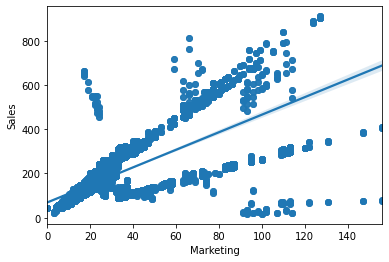

In [12]:
lineMS = LinearRegression().fit(m, s) #regression line
coeffsMS = np.array([[lineMS.intercept_], [lineMS.coef_]]) #coefficients of regression line
print("y = " + str(coeffsMS[1][0][0])+"*x + " + str(coeffsMS[0][0][0]))
detMS = lineMS.score(m, s) #coefficient of determination
print("R**2 = " + str(detMS))
corrMS = np.sign(lineMS.coef_)*np.sqrt(detMS) #correlation coefficient
print("R = " + str(corrMS[0][0]))
predictionMS = lineMS.predict(m)
MSEMS = mean_squared_error(s, predictionMS) #mean squared error
print("MSE = " + str(MSEMS))
graphMS = sns.regplot(x=dframe['Marketing'], y=dframe['Sales'])
graphMS.set(xlabel='Marketing', ylabel='Sales')

## Marketing VS Profit

y = 0.8485918396366977*x + 34.63433254142375
R**2 = 0.050834483148672005
R = 0.22546503753059366
MSE = 9816.453096807567


[Text(0.5, 0, 'Marketing'), Text(0, 0.5, 'Profit')]

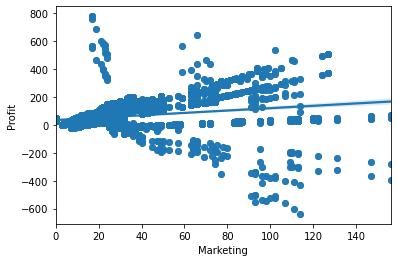

In [13]:
lineMP = LinearRegression().fit(m, p) #regression line
coeffsMP = np.array([[lineMP.intercept_], [lineMP.coef_]]) #coefficients of regression line
print("y = " + str(coeffsMP[1][0][0])+"*x + " + str(coeffsMP[0][0][0]))
detMP = lineMP.score(m, p) #coefficient of determination
print("R**2 = " + str(detMP))
corrMP = np.sign(lineMP.coef_)*np.sqrt(detMP) #correlation coefficient
print("R = " + str(corrMP[0][0]))
predictionMP = lineMP.predict(m)
MSEMP = mean_squared_error(p, predictionMP) #mean squared error
print("MSE = " + str(MSEMP))
graphMP = sns.regplot(x=dframe['Marketing'], y=dframe['Profit'])
graphMP.set(xlabel='Marketing', ylabel='Profit')

## Sales VS Profit

y = 0.5365823401211974*x - 42.456003963535544
R**2 = 0.635736572930351
R = 0.797330905540699
MSE = 3767.2827164787145


[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Profit')]

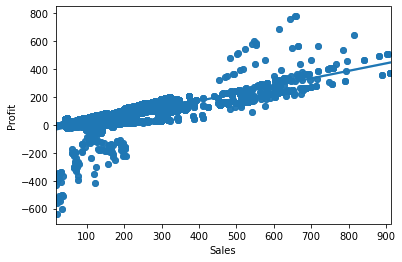

In [14]:
lineSP = LinearRegression().fit(s, p) #regression line
coeffsSP = np.array([[lineSP.intercept_], [lineSP.coef_]]) #coefficients of regression line
print("y = " + str(coeffsSP[1][0][0])+"*x - " + str(-coeffsSP[0][0][0]))
detSP = lineSP.score(s, p) #coefficient of determination
print("R**2 = " + str(detSP))
corrSP = np.sign(lineSP.coef_)*np.sqrt(detSP) #correlation coefficient
print("R = " + str(corrSP[0][0]))
predictionSP = lineSP.predict(s)
MSESP = mean_squared_error(p, predictionSP) #mean squared error
print("MSE = " + str(MSESP))
graphSP = sns.regplot(x=dframe['Sales'], y=dframe['Profit'])
graphSP.set(xlabel='Sales', ylabel='Profit')

## Market Size

[37.85328638497653, 26.718553459119498]


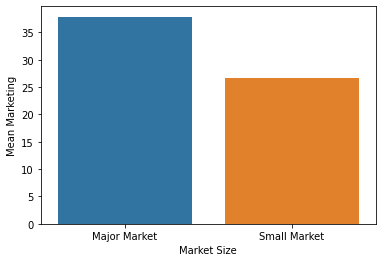

In [15]:
graphmarketmeanM = sns.barplot(x=market_sizes, y=marketmeanM)
graphmarketmeanM.set(xlabel='Market Size', ylabel='Mean Marketing')
print(marketmeanM)

[249.49589201877933, 155.13757861635222]


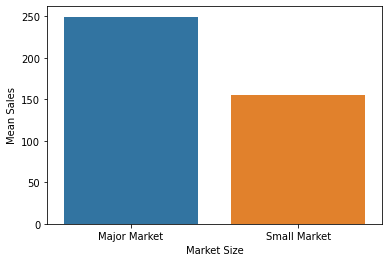

In [16]:
graphmarketmeanS = sns.barplot(x=market_sizes, y=marketmeanS)
graphmarketmeanS.set(xlabel='Market Size', ylabel='Mean Sales')
print(marketmeanS)

[91.3943661971831, 40.804638364779876]


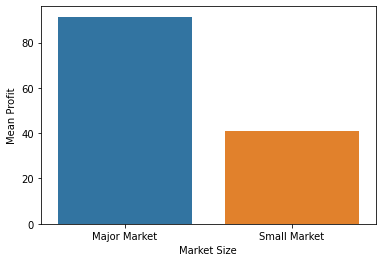

In [17]:
graphmarketmeanP = sns.barplot(x=market_sizes, y=marketmeanP)
graphmarketmeanP.set(xlabel='Market Size', ylabel='Mean Profit')
print(marketmeanP)

## Coffee Type

[63.66583333333333, 57.762445887445885]


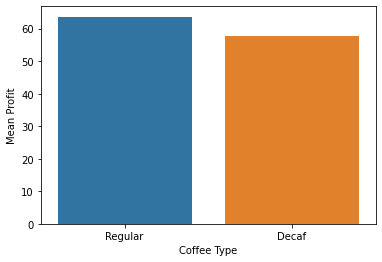

In [18]:
graphtypemean = sns.barplot(x=types, y=typemean)
graphtypemean.set(xlabel='Coffee Type', ylabel='Mean Profit')
print(typemean)

## Coffee Product Lines

[64.20385304659499, 57.65873015873016]


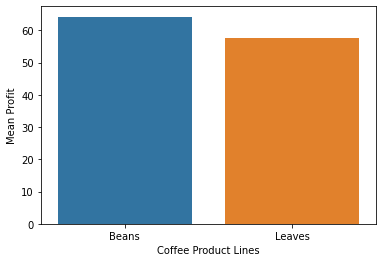

In [19]:
graphlinemean = sns.barplot(x=product_lines, y=linemean)
graphlinemean.set(xlabel='Coffee Product Lines', ylabel='Mean Profit')
print(linemean)

[69.31388888888888, 55.19375]
[54.91287878787879, 59.89962121212121]


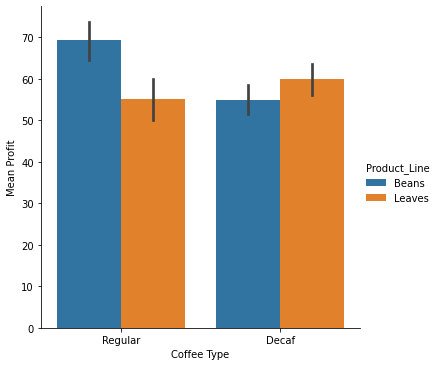

In [20]:
Graphlinemean = sns.catplot(data=dframe, kind="bar", x="Type", y="Profit", hue="Product_Line")
Graphlinemean.set(xlabel='Coffee Type', ylabel='Mean Profit')
print(rlinemean)
print(dlinemean)

## Coffee Product Types

[70.72253787878788, 55.19375, 58.35034013605442, 59.89962121212121]


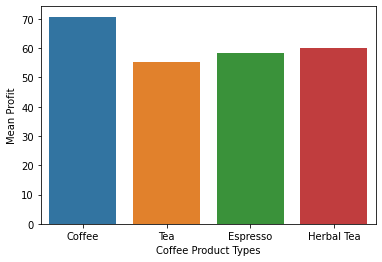

In [21]:
graphprodtypemean = sns.barplot(x=product_types, y=prodtypemean)
graphprodtypemean.set(xlabel='Coffee Product Types', ylabel='Mean Profit')
print(prodtypemean)

[90.31845238095238, 55.19375, 50.934895833333336, nan]
[36.4296875, nan, 72.30882352941177, 59.89962121212121]


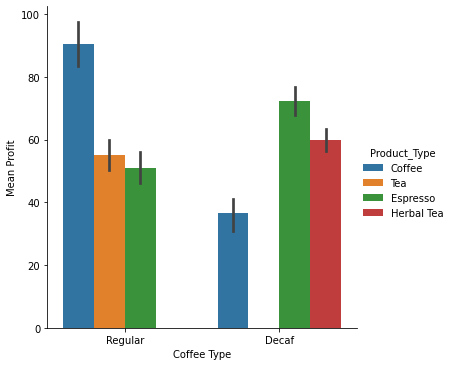

In [22]:
Graphprodtypemean = sns.catplot(data=dframe, kind="bar", x="Type", y="Profit", hue="Product_Type")
Graphprodtypemean.set(xlabel='Coffee Type', ylabel='Mean Profit')
print(rprodtypemean)
print(dprodtypemean)

### Beans

[70.72253787878788, 58.35034013605442]


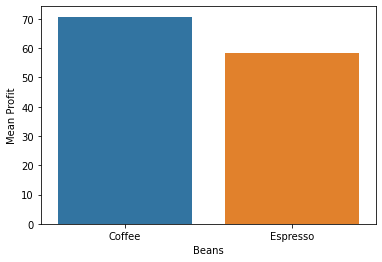

In [23]:
graphBeanmean = sns.barplot(x=Beans, y=Beanmean)
graphBeanmean.set(xlabel='Beans', ylabel='Mean Profit')
print(Beanmean)

[90.31845238095238, 50.934895833333336]
[36.4296875, 72.30882352941177]


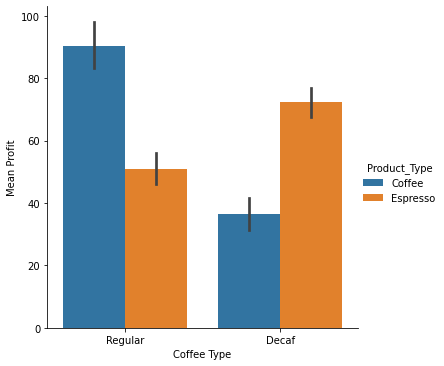

In [24]:
GraphBeanmean = sns.catplot(data=beans, kind="bar", x="Type", y="Profit", hue="Product_Type")
GraphBeanmean.set(xlabel='Coffee Type', ylabel='Mean Profit')
print(rbeanmean)
print(dbeanmean)

### Leaves

[55.19375, 59.89962121212121]


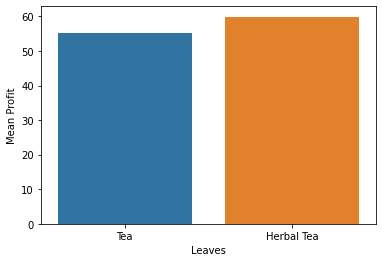

In [25]:
graphLeavesmean = sns.barplot(x=Leaves, y=Leavesmean)
graphLeavesmean.set(xlabel='Leaves', ylabel='Mean Profit')
print(Leavesmean)

#### All regular tea is non-decaf and all herbal tea is decaf